In [ ]:
#A notebook to combine the probability and intensity predictions

In [20]:
#Import modules

import xarray as xr
import matplotlib.pyplot as plt

import imp
imp.load_source('DataFns', "/glade/work/kwheelan/NCAR-Downscaling/scripts/DataFns.py")
from DataFns import *

imp.load_source('StatFns', "/glade/work/kwheelan/NCAR-Downscaling/scripts/StatFns.py")
from StatFns import *

In [35]:
#Get probability data

#Random forest probability data
prcp_prob_rf = xr.open_mfdataset('/glade/work/kwheelan/datasets/cellwiseRFpreds/classifier/preds_*_run6.nc')

#OLS probability data
prcp_prob_OLS = xr.open_dataset('/glade/work/kwheelan/datasets/FinalModelsPreds/OLS_log_oddyrs.nc')

In [32]:
#Get intensity data

#Random forest intensity
intensity_rf = xr.open_mfdataset('/glade/work/kwheelan/datasets/cellwiseRFpreds/intensity/preds_*_run6.nc')

#OLS intensity
intensity_OLS = xr.open_dataset('/glade/work/kwheelan/datasets/OLS/OLS_oddyrs_preds_nonzero.nc')


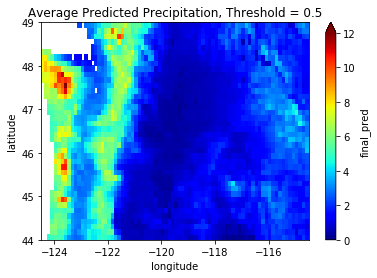

In [26]:
THRESH = 0.5 #the static threshold for prcp/ no prcp

ds = prcp_prob_rf

ds['preds'] = intensity_rf.Predictions #intensity data
ds['class_preds'] = prcp_prob_rf.Predictions #probability data
#plotting and combining probability and intensity using static threshold
finalpreds = plotPrcp_2layer(ds, thresh = THRESH)

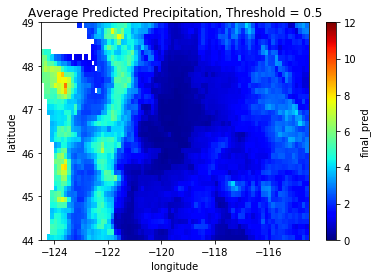

In [36]:
THRESH = 0.5 #the static threshold for prcp/ no prcp

ds = prcp_prob_OLS

ds['preds'] = intensity_OLS.cell_preds #intensity data
ds['class_preds'] = prcp_prob_OLS.cell_preds #probability data
#plotting and combining probability and intensity using static threshold
finalpreds = plotPrcp_2layer(ds, thresh = THRESH)

In [ ]:
#Write file
file_name = '/glade/scratch/kwheelan/datasets/FinalModelsPreds/Cellwise_RF_allOddYrs.nc' #where to save the netcdf

x = finalpreds.set_index(['time','latitude','longitude']).to_xarray()
x=x.drop(['Predictions','preds_class'])
x = x.rename({'Prcp':'obs', 'm':'RCM','preds':'predicted_intensity','class_preds':'prcp_probability','final_pred':'final_prcp_prediction'})
#x.to_netcdf(file_name)